https://libgen.lc/scimag/ads.php?doi=10.1063/1.555629

In [17]:
import sys
sys.path.insert(0, r"C:\Users\araujoj\Dropbox\MontyCarlo\tools")
from data import get_bookmarked_text, getAxis
from performance import timer

EPDL_path = r"C:\Users\araujoj\Dropbox\MontyCarlo\materials\EPDL"

def getData(Z):
    bookmarked_text = get_bookmarked_text(EPDL_path + f"\{Z}.txt")
    F = bookmarked_text[(7, 73, 0, 0, 0, 0)]

    Iflag, F = F
    xAxis, yAxis = getAxis(F)
    return xAxis, yAxis

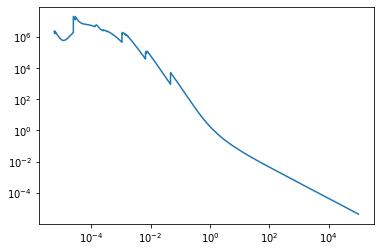

In [18]:
from matplotlib.pyplot import *

figure()
ax = gca()
x, y = getData(62)
ax.plot(x, y)
ax.set_yscale('log'); ax.set_xscale('log')
show()

In [19]:
def getDataS(Z, subshell):
    bookmarked_text = get_bookmarked_text(EPDL_path + f"\{Z}.txt")
    F = bookmarked_text[(7, 73, 91, subshell, 0, 0)]

    Iflag, F = F
    xAxis, yAxis = getAxis(F)
    return xAxis, yAxis

In [52]:
getDataS(82, 1)[0][0]

0.088011

In [61]:
getDataS(82, 14)[0][0]

0.00249

In [ ]:
shell_dict = {1:"K", 
              2:"L",  3:"L1",  4:"L23",   5:"L2", 6:"L3",
              7:"M",  8:"M1",  9:"M23",  10:"M2", 11:"M3", 12:"M45", 13:"M4", 14:"M5",
              15:"N", 16:"N1", 17:"N23", 18:"N2", 19:"N3", 20:"N45", 21:"N4", 22:"N5", 23:"N67", 24:"N6", 25:"N7",
              26:"O", 27:"O1", 28:"O23", 29:"O2", 30:"O3", 31:"O45", 32:"O4", 33:"O5", 34:"O67", 35:"O6", 36:"O7", 37:"O89", 38:"O8", 39:"O9"}


In [220]:
from numpy import *



#callables to fit data
def fit0(lnE):
    E = exp(lnE)
    return E


glob_fits = [fit0,
             lambda lnE, A, B, C, D: exp(A - B*lnE + C/lnE + D/lnE**2), #Ek < E < Ec
             lambda lnE, A, B, C, D: exp(A - B*lnE + C/lnE + D/lnE**2),
             lambda lnE, A, B:       exp(A - B*lnE),
             lambda lnE, A, B:       exp(A - B*lnE),
             lambda lnE, A, B, C, D: exp(A - B*lnE + C/lnE + D/lnE**2),
             lambda lnE, A, B:       exp(A - B*lnE),
             lambda lnE, A, B:       exp(A - B*lnE),
             lambda lnE, A, B:       exp(A - B*lnE),
             lambda lnE, A, B:       exp(A - B*lnE),
             lambda lnE, A, B, C, D: exp(A-B*lnE + C/lnE + D/lnE**2),
             lambda lnE, A, B, C, D: 0.98*  exp(A - B*lnE + C/lnE + D/lnE**2),
             lambda lnE, A, B, C, D: 0.9665*exp(A - B*lnE + C/lnE + D/lnE**2),
             lambda lnE, A, B, C, D: 0.9094*exp(A - B*lnE + C/lnE + D/lnE**2)]

def func_gen(*args):
    args = list(args)
    fits = glob_fits[0:len(args)]
    fits.reverse()
    args.reverse()
    def func(E):
        k = searchsorted(args, E)
        return fits[k](log(E))
    return func

In [221]:
f = func_gen(4, 3, 2, 1)

In [225]:
f(1.2, 1, 2, 3, 4)

TypeError: func() takes 1 positional argument but 5 were given

In [148]:
a = [1, 2, 3]
a.reverse()
a

[3, 2, 1]

### f.__closure__

In [73]:
getDataS(82, 30)[0][0]

9e-05

In [74]:
9e-05/0.511

0.00017612524461839532